# Final Project : - Building two Recommendation Systems

## Data Preperation

In [24]:
pip install pandas numpy scikit-learn matplotlib seaborn torch requests tweepy vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [25]:
import pandas as pd

# Load u.data and u.item datasets
u_data = pd.read_csv('/Users/salmanmohamm3d/Desktop/Social M A/Final Project/u.data.csv', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
u_item = pd.read_csv('/Users/salmanmohamm3d/Desktop/Social M A/Final Project/u.item', sep='|', names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], encoding='latin-1')


In [26]:
u_data.head(10)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [27]:
u_item.head(20)

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Dropping the NAN value column

In [29]:
u_item = u_item.drop('video_release_date', axis=1)

In [30]:
u_item.head(10)

,movie_id,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Building Collaborative Filtering-Based Recommender using Matrix Factorization Model

#### Creating a user-item rating matrix

In [64]:
num_users = u_data.user_id.unique().shape[0]
num_items = u_data.item_id.unique().shape[0]
R = np.zeros((num_users, num_items))

for row in u_data.itertuples():
    R[row.user_id - 1, row.item_id - 1] = row.rating

print(f"User-Item Matrix: \n{R}")


User-Item Matrix: 
[[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


#### Display the user-item rating matrix with zeros for missing ratings

In [73]:
print("User-Item Matrix with Missing Ratings (0s indicate missing ratings):")
R_df = pd.DataFrame(R, columns=[f'Item {i+1}' for i in range(num_items)], index=[f'User {i+1}' for i in range(num_users)])
print(R_df)

User-Item Matrix with Missing Ratings (0s indicate missing ratings):
          Item 1  Item 2  Item 3  Item 4  Item 5  Item 6  Item 7  Item 8  \
User 1       5.0     3.0     4.0     3.0     3.0     5.0     4.0     1.0   
User 2       4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
User 3       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
User 4       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
User 5       4.0     3.0     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...     ...     ...     ...     ...     ...     ...     ...   
User 939     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
User 940     0.0     0.0     0.0     2.0     0.0     0.0     4.0     5.0   
User 941     5.0     0.0     0.0     0.0     0.0     0.0     4.0     0.0   
User 942     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
User 943     0.0     5.0     0.0     0.0     0.0     0.0     0.0     0.0   

          Item 9  

In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score
from math import sqrt

class MatrixFactorization:
    def __init__(self, R, K, alpha, beta, iterations):
        # Initialize the MatrixFactorization model
        self.R = R  # User-item rating matrix
        self.num_users, self.num_items = R.shape  # Number of users and items
        self.K = K  # Number of latent factors
        self.alpha = alpha  # Learning rate
        self.beta = beta  # Regularization parameter
        self.iterations = iterations  # Number of iterations

    def train(self):
        # Initialize user and item latent feature matrices with random values
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initialize biases
        self.b_u = np.zeros(self.num_users)  # User biases
        self.b_i = np.zeros(self.num_items)  # Item biases
        self.b = np.mean(self.R[np.where(self.R != 0)])  # Global bias

        # Create a list of known ratings
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]

        # Training process
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()  # Perform stochastic gradient descent
            rmse = self.rmse()  # Compute RMSE
            training_process.append((i, rmse))
            print("Iteration: %d ; error = %.4f" % (i+1, rmse))

        return training_process

    def sgd(self):
        # Perform stochastic gradient descent
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)  # Predicted rating
            e = (r - prediction)  # Prediction error

            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            # Update latent feature matrices
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        # Compute predicted rating
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    def rmse(self):
        # Compute RMSE
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return sqrt(error/len(xs))

    def mae(self):
        # Compute MAE
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix
        error = 0
        for x, y in zip(xs, ys):
            error += abs(self.R[x, y] - predicted[x, y])
        return error/len(xs)

    def precision_recall_f1(self, threshold=3.5):
        # Compute Precision, Recall, and F1-Score
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix

        y_true = []
        y_pred = []

        for x, y in zip(xs, ys):
            y_true.append(self.R[x, y] >= threshold)
            y_pred.append(predicted[x, y] >= threshold)

        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        return precision, recall, f1

    def full_matrix(self):
        # Compute full predicted ratings matrix
        return self.b + self.b_u[:, np.newaxis] + self.b_i[np.newaxis:, ] + self.P.dot(self.Q.T)


# R is already defined as the user-item rating matrix
mf = MatrixFactorization(R, K=20, alpha=0.001, beta=0.001, iterations=50) 
training_process = mf.train()

# Evaluate the model
rmse = mf.rmse()
mae = mf.mae()
precision, recall, f1 = mf.precision_recall_f1()

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Iteration: 1 ; error = 1.0675
Iteration: 2 ; error = 1.0341
Iteration: 3 ; error = 1.0126
Iteration: 4 ; error = 0.9977
Iteration: 5 ; error = 0.9868
Iteration: 6 ; error = 0.9784
Iteration: 7 ; error = 0.9717
Iteration: 8 ; error = 0.9662
Iteration: 9 ; error = 0.9616
Iteration: 10 ; error = 0.9577
Iteration: 11 ; error = 0.9543
Iteration: 12 ; error = 0.9514
Iteration: 13 ; error = 0.9487
Iteration: 14 ; error = 0.9464
Iteration: 15 ; error = 0.9443
Iteration: 16 ; error = 0.9423
Iteration: 17 ; error = 0.9406
Iteration: 18 ; error = 0.9390
Iteration: 19 ; error = 0.9375
Iteration: 20 ; error = 0.9361
Iteration: 21 ; error = 0.9348
Iteration: 22 ; error = 0.9336
Iteration: 23 ; error = 0.9325
Iteration: 24 ; error = 0.9315
Iteration: 25 ; error = 0.9305
Iteration: 26 ; error = 0.9295
Iteration: 27 ; error = 0.9286
Iteration: 28 ; error = 0.9278
Iteration: 29 ; error = 0.9270
Iteration: 30 ; error = 0.9262
Iteration: 31 ; error = 0.9254
Iteration: 32 ; error = 0.9247
Iteration: 33 ; e

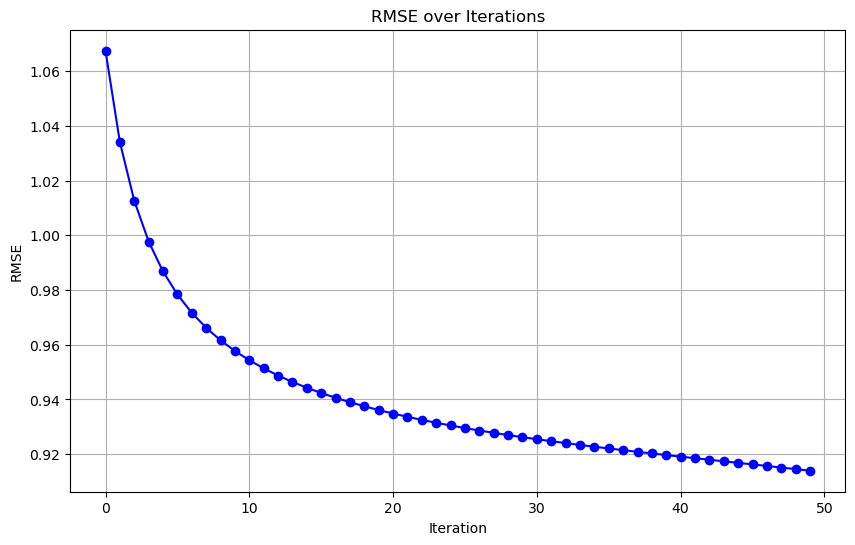

In [63]:
import matplotlib.pyplot as plt

# Extract iteration numbers and RMSE values
iterations = [x[0] for x in training_process]
errors = [x[1] for x in training_process]

# Plot RMSE over iterations
plt.figure(figsize=(10, 6))
plt.plot(iterations, errors, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('RMSE over Iterations')
plt.grid(True)
plt.show()


### To improve the scores of our Matrix Factorization model, we are tune the following parameters:

Number of Latent Factors (K): Experimenting with different values for the latent features between 10 and 100.

Learning Rate (alpha): Adjusting the learning rate between 0.0001 and 0.01 to ensure the model converges appropriately. 

Regularization Parameter (beta): Modifying the regularization parameter from 0.001 to 0.1 to prevent overfitting.

Number of Iterations: Increasing or decreasing the number of iterations between 50 to 100 based on the convergence behavior of the model.


### Hyper-parameter tuning

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score
from math import sqrt

class MatrixFactorization:
    def __init__(self, R, K, alpha, beta, iterations):
        # Initialize the MatrixFactorization model
        self.R = R  # User-item rating matrix
        self.num_users, self.num_items = R.shape  # Number of users and items
        self.K = K  # Number of latent factors
        self.alpha = alpha  # Learning rate
        self.beta = beta  # Regularization parameter
        self.iterations = iterations  # Number of iterations

    def train(self):
        # Initialize user and item latent feature matrices with random values
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initialize biases
        self.b_u = np.zeros(self.num_users)  # User biases
        self.b_i = np.zeros(self.num_items)  # Item biases
        self.b = np.mean(self.R[np.where(self.R != 0)])  # Global bias

        # Create a list of known ratings
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]

        # Training process
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()  # Perform stochastic gradient descent
            rmse = self.rmse()  # Compute RMSE
            training_process.append((i, rmse))
            print("Iteration: %d ; error = %.4f" % (i+1, rmse))

        return training_process

    def sgd(self):
        # Perform stochastic gradient descent
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)  # Predicted rating
            e = (r - prediction)  # Prediction error

            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            # Update latent feature matrices
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        # Compute predicted rating
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    def rmse(self):
        # Compute RMSE
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return sqrt(error/len(xs))

    def mae(self):
        # Compute MAE
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix
        error = 0
        for x, y in zip(xs, ys):
            error += abs(self.R[x, y] - predicted[x, y])
        return error/len(xs)

    def precision_recall_f1(self, threshold=3.5):
        # Compute Precision, Recall, and F1-Score
        xs, ys = self.R.nonzero()  # Indices of known ratings
        predicted = self.full_matrix()  # Predicted ratings matrix

        y_true = []
        y_pred = []

        for x, y in zip(xs, ys):
            y_true.append(self.R[x, y] >= threshold)
            y_pred.append(predicted[x, y] >= threshold)

        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        return precision, recall, f1

    def full_matrix(self):
        # Compute full predicted ratings matrix
        return self.b + self.b_u[:, np.newaxis] + self.b_i[np.newaxis:, ] + self.P.dot(self.Q.T)


# R is already defined as the user-item rating matrix
mf = MatrixFactorization(R, K=50, alpha=0.01, beta=0.01, iterations=100) #did some hyper parameter tuning
training_process = mf.train()

# Evaluate the model
rmse = mf.rmse()
mae = mf.mae()
precision, recall, f1 = mf.precision_recall_f1()

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Iteration: 1 ; error = 0.9591
Iteration: 2 ; error = 0.9384
Iteration: 3 ; error = 0.9292
Iteration: 4 ; error = 0.9237
Iteration: 5 ; error = 0.9199
Iteration: 6 ; error = 0.9163
Iteration: 7 ; error = 0.9117
Iteration: 8 ; error = 0.9048
Iteration: 9 ; error = 0.8950
Iteration: 10 ; error = 0.8814
Iteration: 11 ; error = 0.8655
Iteration: 12 ; error = 0.8476
Iteration: 13 ; error = 0.8279
Iteration: 14 ; error = 0.8065
Iteration: 15 ; error = 0.7835
Iteration: 16 ; error = 0.7595
Iteration: 17 ; error = 0.7350
Iteration: 18 ; error = 0.7103
Iteration: 19 ; error = 0.6860
Iteration: 20 ; error = 0.6625
Iteration: 21 ; error = 0.6396
Iteration: 22 ; error = 0.6181
Iteration: 23 ; error = 0.5977
Iteration: 24 ; error = 0.5786
Iteration: 25 ; error = 0.5608
Iteration: 26 ; error = 0.5444
Iteration: 27 ; error = 0.5291
Iteration: 28 ; error = 0.5151
Iteration: 29 ; error = 0.5022
Iteration: 30 ; error = 0.4901
Iteration: 31 ; error = 0.4791
Iteration: 32 ; error = 0.4690
Iteration: 33 ; e

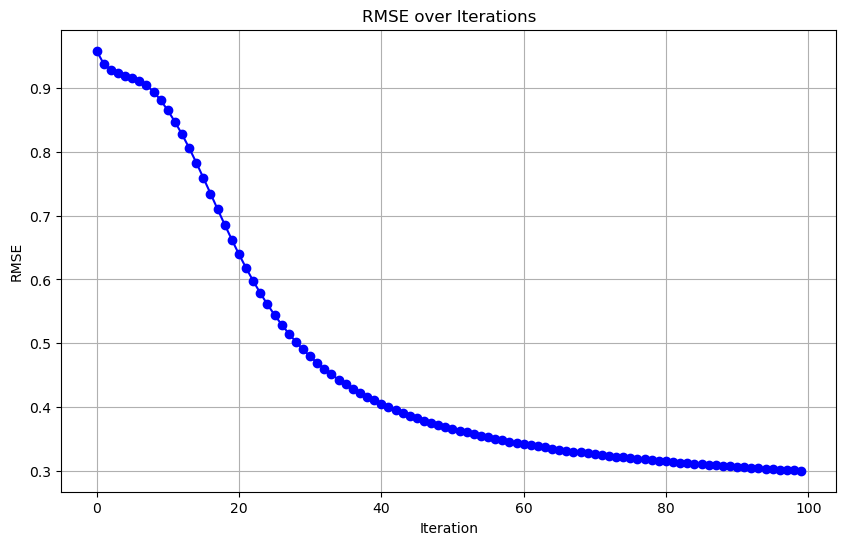

In [60]:
import matplotlib.pyplot as plt

# Extract iteration numbers and RMSE values
iterations = [x[0] for x in training_process]
errors = [x[1] for x in training_process]

# Plot RMSE over iterations
plt.figure(figsize=(10, 6))
plt.plot(iterations, errors, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('RMSE over Iterations')
plt.grid(True)
plt.show()


## With this parameters : - 

K (Number of latent factors): 50

alpha (Learning rate): 0.01

beta (Regularization parameter): 0.01

iterations: 100

## We are getting this scores : - 

RMSE: 0.2998

MAE: 0.2226

Precision: 0.9660

Recall: 0.9708

F1-Score: 0.9684

### These metrics suggest that our model is performing quite well

In [70]:
# Assuming mf is your trained MatrixFactorization instance

# Get the full predicted ratings matrix
predicted_ratings = mf.full_matrix()

# Display the full predicted ratings matrix
print("Full Predicted Ratings Matrix:")
print(predicted_ratings)

# Get predictions for specific user-item pairs
# For example, to get the prediction for user 0 and item 0
user_id = 1
item_id = 6
predicted_rating = mf.get_rating(user_id, item_id)
print(f"Predicted rating for user {user_id} and item {item_id}: {predicted_rating:.4f}")

# Display predictions for the first 5 users and items
print("Predicted Ratings for the first 5 users and items:")
for user_id in range(5):
    for item_id in range(5):
        print(f"User {user_id} - Item {item_id}: {mf.get_rating(user_id, item_id):.4f}")


Full Predicted Ratings Matrix:
[[3.90250956 3.30269675 3.09766928 ... 3.38570705 3.47830961 3.44627063]
 [3.92791175 3.40346069 3.16091892 ... 3.45528653 3.54397957 3.4896026 ]
 [3.35929976 2.80061686 2.59514308 ... 2.86687371 2.95296031 2.90599248]
 ...
 [4.16674991 3.56460064 3.3697075  ... 3.65895633 3.71376238 3.67265747]
 [4.38174622 3.81163012 3.55921635 ... 3.87863694 3.9216973  3.91682077]
 [3.799959   3.26343404 2.96174174 ... 3.32031367 3.39281123 3.33682102]]
Predicted rating for user 1 and item 6: 3.8910
Predicted Ratings for the first 5 users and items:
User 0 - Item 0: 3.9025
User 0 - Item 1: 3.3027
User 0 - Item 2: 3.0977
User 0 - Item 3: 3.6028
User 0 - Item 4: 3.3385
User 1 - Item 0: 3.9279
User 1 - Item 1: 3.4035
User 1 - Item 2: 3.1609
User 1 - Item 3: 3.6696
User 1 - Item 4: 3.3795
User 2 - Item 0: 3.3593
User 2 - Item 1: 2.8006
User 2 - Item 2: 2.5951
User 2 - Item 3: 3.0670
User 2 - Item 4: 2.7984
User 3 - Item 0: 4.5248
User 3 - Item 1: 3.9462
User 3 - Item 2: 3.

## Printing the data with predicted ratings

In [74]:
# Get the full predicted ratings matrix
predicted_ratings = mf.full_matrix()

# Replace the zeros in the original matrix with the predicted ratings
completed_matrix = R.copy()
completed_matrix[completed_matrix == 0] = predicted_ratings[completed_matrix == 0]

# Convert to DataFrame for better readability
completed_matrix_df = pd.DataFrame(completed_matrix, columns=[f'Item {i+1}' for i in range(num_items)], index=[f'User {i+1}' for i in range(num_users)])

print("Completed User-Item Matrix with Predicted Ratings:")
print(completed_matrix_df)

Completed User-Item Matrix with Predicted Ratings:
            Item 1    Item 2    Item 3    Item 4    Item 5    Item 6  \
User 1    5.000000  3.000000  4.000000  3.000000  3.000000  5.000000   
User 2    4.000000  3.403461  3.160919  3.669613  3.379534  3.707454   
User 3    3.359300  2.800617  2.595143  3.066982  2.798398  3.136845   
User 4    4.524826  3.946169  3.758283  4.262707  3.964490  4.303562   
User 5    4.000000  3.000000  2.568876  3.054829  2.771765  3.120203   
...            ...       ...       ...       ...       ...       ...   
User 939  4.807285  4.227731  4.006538  4.489548  4.223569  4.545501   
User 940  3.609767  2.972218  2.853970  2.000000  3.019836  3.330202   
User 941  5.000000  3.564601  3.369707  3.841930  3.599250  3.939023   
User 942  4.381746  3.811630  3.559216  4.079129  3.818607  4.120988   
User 943  3.799959  5.000000  2.961742  3.544847  3.250273  3.556356   

            Item 7    Item 8    Item 9   Item 10  ...  Item 1673  Item 1674  \
User 